# Predicting Houses Prices in the Boston Area

In this notebook we will use the popular Boston Housing Dataset and apply a linear regression as well as some validation tests on our regression results.



In [1]:
# import libraries
from sklearn.datasets import load_boston # dataset
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.compat import lzip
import statsmodels.stats.api as sm
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.model_selection import train_test_split
import statsmodels as sm
import statsmodels.formula.api as smf
from sklearn import linear_model
from sklearn.decomposition import PCA
import numpy as np
from sklearn import preprocessing

%matplotlib inline

/usr/local/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
# instantiate dataset and create DataFrame 
boston = load_boston()
df = pd.DataFrame(boston.data, columns=boston.feature_names)

#normalize data
df1 = pd.DataFrame(preprocessing.scale(df),columns = df.columns) 
df1 = df.as_matrix()
target = pd.DataFrame(boston.target, columns=["MEDV"])
#df = df.drop(["CRIM","INDUS"], axis = 1)

In [3]:
df1

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

## PCA

To repeat, PCA is a linear transformation of the variables into a lower dimensional space which retain maximal amount of information about the variables. 

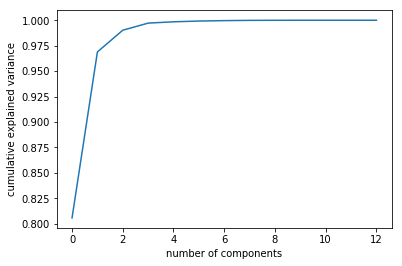

In [11]:
#check how many components explain % variance
pca = PCA().fit(df1.data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

## We see that we only need 5 features

In [5]:
# we see that we only need 5 features
pca = PCA(n_components=5)
pca.fit(df1)
df_pca = pca.transform(df1)
print("original shape:   ", df1.shape)
print("transformed shape:", df_pca.shape)

important_features = (pd.DataFrame(pca.components_,columns=df.columns,index = ['PC-1','PC-2',"PC-3","PC-4","PC-5"]))

original shape:    (506, 13)
transformed shape: (506, 5)


In [7]:
df_pca.shape

(506, 5)

## But which features are most important in this new low-dimensional sub-space

Below we have our PC coefficients in the rows. They are the coefficients of linear combination that defines principal component #1, and the second rows shows coefficients for principal component #2, and so on and so forth. For each PC, the feature with the highest score represents the feature explaining the maximum varation along that axis. 




In [88]:
pos_pca = pd.DataFrame.abs(important_features)
print(pos_pca)
for i in range(5):
    print(max(pos_pca.iloc[i]))

          CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
PC-1  0.029079  0.043590  0.028331  0.000056  0.000450  0.001168  0.083634   
PC-2  0.005954  0.001175  0.004949  0.000103  0.000002  0.000366  0.005721   
PC-3  0.011555  0.632897  0.088340  0.000975  0.001807  0.004734  0.755862   
PC-4  0.027001  0.768062  0.012797  0.000854  0.000680  0.005701  0.636612   
PC-5  0.953872  0.005654  0.056238  0.002136  0.000179  0.013218  0.045917   

           DIS       RAD       TAX   PTRATIO         B     LSTAT  
PC-1  0.006562  0.045006  0.949749  0.005600  0.291215  0.022943  
PC-2  0.000354  0.008618  0.292381  0.002529  0.956193  0.005767  
PC-3  0.045088  0.002848  0.093867  0.011159  0.023554  0.092833  
PC-4  0.002574  0.019566  0.019976  0.032012  0.004014  0.045289  
PC-5  0.006672  0.170588  0.032626  0.021338  0.016271  0.231769  
0.949748861684
0.95619302773
0.7558624017
0.768061561807
0.953871800695


In [8]:
#df_new = pca.inverse_transform(df_pca)
#plt.scatter(df[:, 0], df[:, 1], alpha=0.2)
#plt.scatter(df_new[:, 0], df_new[:, 1], alpha=0.8)
#plt.axis('equal');

NameError: name 'v2' is not defined

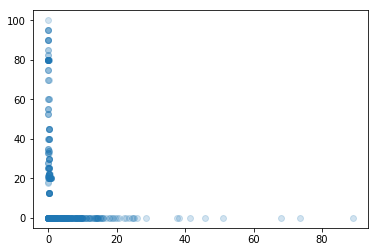

In [26]:
def draw_vector(v0, v1, v2,v3,v4, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, v2,v3,v4, arrowprops=arrowprops)

# plot data
plt.scatter(df[:, 0], df[:, 1], alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v,v2,v3,v4)
plt.axis('equal');

In [17]:
boston

{'DESCR': "Boston House Prices dataset\n===========================\n\nNotes\n------\nData Set Characteristics:  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive\n    \n    :Median Value (attribute 14) is usually the target\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate per

In [64]:
# Basic exploratory analyses 
print("Rows,Columns:",df.shape)
df.describe()

Rows,Columns: (506, 11)


,ZN,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,11.363636,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,23.322453,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.000000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.000000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.000000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,12.500000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,100.000000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [65]:
# count missing values
print(df.isnull().sum())

ZN         0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64


In [66]:
df

,ZN,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,18.0,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.0,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.0,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.0,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.0,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
5,0.0,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21
6,12.5,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43
7,12.5,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15
8,12.5,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93
9,12.5,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10


Populating the interactive namespace from numpy and matplotlib


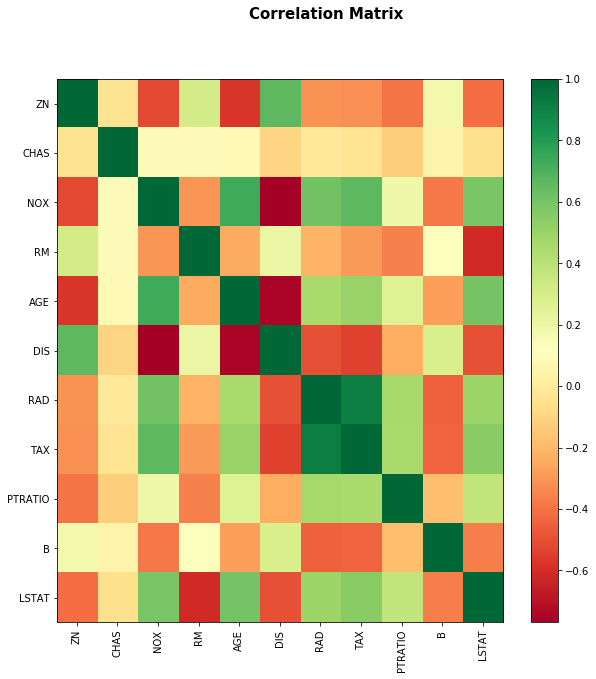

In [76]:
corr = df.corr()
%pylab inline
plt.figure(figsize=(10, 10))
plt.imshow(corr, cmap='RdYlGn', interpolation='none', aspect='auto')
plt.colorbar()
plt.xticks(range(len(corr)), corr.columns, rotation='vertical')
plt.yticks(range(len(corr)), corr.columns);
plt.suptitle('Correlation Matrix', fontsize=15, fontweight='bold')
plt.show()

In [67]:
# split dataset into training and testing set
X_train, X_test, Y_train, Y_test = train_test_split(df, target, test_size=0.30)

In [68]:
# Fitting using stats model
model_1 = smf.OLS(Y_train,X_train).fit()

prediction_1 = model_1.predict(X_train) # predict y_train values
prediction_2 = model_1.predict(X_test)# predict y_test values 

In [70]:
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     688.5
Date:                Tue, 05 Dec 2017   Prob (F-statistic):          3.07e-226
Time:                        11:54:35   Log-Likelihood:                -1081.1
No. Observations:                 354   AIC:                             2184.
Df Residuals:                     343   BIC:                             2227.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
ZN             0.0488      0.017      2.826      0.005       0.015       0.083
CHAS           2.8273      1.085      2.605      0.010       0.693       4.962
NOX           -3.7013      4.203     -0.881      0.379     -11.967       4.565
RM             5.7948      0.371     15.639      0.000       5.066       6.524
AGE           -0.0031      0.017     -0.180      0.857      -0.037       0.031
DIS           -0.9633      0.226     -4.255      0.000      -1.409      -0.518
RAD            0.1292      0.083      1.563      0.119      -0.033       0.292
TAX           -0.0095      0.005     -2.067      0.039      -0.019      -0.000
PTRATIO       -0.3228      0.133     -2.420      0.016      -0.585      -0.060
B              0.0151      0.003      4.326      0.000       0.008       0.022
LSTAT         -0.4365      0.061     -7.119      0.000      -0.557      -0.316
==============================================================================
Omnibus:                      112.039   Durbin-Watson:                   1.969
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              487.707
Skew:                           1.295   Prob(JB):                    1.25e-106
Kurtosis:                       8.134   Cond. No.                     8.47e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.47e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Looking at the Summary

In the summary we see some interesting results. The INDUS coefficient (proportion of non-retail business acres per town) is not nearly statistically significant at the 5% or 10% level. The same goes for the AGE and NOX variables. 

There seems to be no autocorrelation (as expected as this is not a time-series problem). 

Overall, the Adjusted R^2 score is great, but how about RMSE (root mean square error), lets have a look. 

In [71]:
rmse_training = sqrt(mean_squared_error(Y_train, prediction_1))
print("RMSE for training data:", rmse_training)
rmse_test = sqrt(mean_squared_error(Y_test,prediction_2))
print("RMSE for test data:", rmse_test)

RMSE for training data: 5.128937617593213
RMSE for test data: 4.5380338047840985


Hmm...  The RMSE for the test data is quite low and very close to that of the training data.  But can we do better?! Lets try by doing a correlation test to identify spurious variables. Lets do a test for **Multicollinearity**

In [72]:

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X_test.values, i) for i in range(X_test.shape[1])]
vif["features"] = X_test.columns
vif

,VIF Factor,features
0,2.592924,ZN
1,1.106998,CHAS
2,63.791966,NOX
3,88.938105,RM
4,23.975225,AGE
5,16.380020,DIS
6,10.576633,RAD
7,48.462280,TAX
8,99.543265,PTRATIO
9,16.817758,B


There is no hard and fast rules on VIF factors, while a score above 10 is undesirable as it suggests very correlation that artificially inflates our R score, a subjective call must be taken depending on the problem. For example, while the TAX variable (full-value property-tax rate per 10,000 dollars) is highly correlated with the rest of the variables, it is too important of a variable to ignore, plus it is very significant at the 5% level. 

NOX and INDUS on the other hand, we can try and remove and see if we get a better model.
Let's re-create our training sets.



In [73]:
#create second training set
#df = df.drop(["NOX","INDUS"], axis = 1)
X_train1, X_test1, Y_train1, Y_test1 = train_test_split(df, target, test_size=0.30)
print(df.shape)
print(X_test1.shape)

(506, 11)
(152, 11)


In [74]:
# fit second model
model_2 = smf.OLS(Y_train1,X_train1).fit()
prediction_3 = model_2.predict(X_train1)# predict y_test values
prediction_4 = model_2.predict(X_test1)# predict y_test values 

In [16]:
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.961
Method:                 Least Squares   F-statistic:                     674.8
Date:                Tue, 05 Dec 2017   Prob (F-statistic):          2.99e-234
Time:                        10:27:44   Log-Likelihood:                -1046.3
No. Observations:                 354   AIC:                             2119.
Df Residuals:                     341   BIC:                             2169.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
CRIM          -0.0849      0.034     -2.463      0.014      -0.153      -0.017
ZN             0.0381      0.017      2.215      0.027       0.004       0.072
INDUS          0.0273      0.071      0.384      0.701      -0.113       0.167
CHAS           0.5631      1.063      0.530      0.597      -1.528       2.654
NOX           -3.6829      3.755     -0.981      0.327     -11.069       3.704
RM             6.1202      0.358     17.112      0.000       5.417       6.824
AGE           -0.0028      0.016     -0.177      0.860      -0.034       0.028
DIS           -0.7605      0.221     -3.448      0.001      -1.194      -0.327
RAD            0.1830      0.073      2.523      0.012       0.040       0.326
TAX           -0.0099      0.004     -2.332      0.020      -0.018      -0.002
PTRATIO       -0.4960      0.125     -3.955      0.000      -0.743      -0.249
B              0.0140      0.003      4.833      0.000       0.008       0.020
LSTAT         -0.3912      0.060     -6.536      0.000      -0.509      -0.273
==============================================================================
Omnibus:                      152.193   Durbin-Watson:                   2.104
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1250.248
Skew:                           1.585   Prob(JB):                    3.25e-272
Kurtosis:                      11.644   Cond. No.                     8.27e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.27e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [17]:
rmse_training_2 = sqrt(mean_squared_error(Y_train1, prediction_3))
print("RMSE for training data:", rmse_training)
rmse_test_2 = sqrt(mean_squared_error(Y_test1,prediction_4))
print("RMSE for test data:", rmse_test)

RMSE for training data: 4.9490874244943175
RMSE for test data: 5.120219061495209


## OLS using SKlearn 

In [18]:
lm = linear_model.LinearRegression()
model_2 = lm.fit(X_train,Y_train)

/usr/local/lib/python3.6/site-packages/scipy/linalg/basic.py:1018: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


In [19]:
prediction_2 = lm.predict(X_test)
print(len(X_test))

152


In [20]:
print(prediction_2)
print(len(prediction_2))

[[ 13.45848139]
 [ 26.03123058]
 [ 11.07418851]
 [ 11.97656838]
 [ 20.58344178]
 [ 22.05268712]
 [ 21.05364611]
 [ 36.89841778]
 [ 34.87771446]
 [  9.39922167]
 [ 20.98581838]
 [ 16.44883389]
 [ 17.3371114 ]
 [ 17.16642044]
 [ 25.04560746]
 [ 36.79487614]
 [ 13.68839291]
 [ 13.35964499]
 [ 15.02278164]
 [ 11.82463391]
 [ 27.46777376]
 [  8.66730265]
 [ 15.58683387]
 [ 22.8356704 ]
 [ 24.18856118]
 [ 13.40355504]
 [ 15.12408397]
 [ 20.70539741]
 [ 25.62945848]
 [ 12.51534316]
 [ 32.6632832 ]
 [ 27.05891466]
 [ 30.40599831]
 [ 21.83821729]
 [ 17.97649287]
 [ 17.2366471 ]
 [  8.76800262]
 [ 16.40331564]
 [  9.14456728]
 [ 17.20414349]
 [ 24.75188921]
 [ 29.14300721]
 [ 37.28987302]
 [ 19.16054039]
 [ 38.98824912]
 [ 29.05711773]
 [ 19.33146163]
 [ 21.06706164]
 [ 17.88184695]
 [ 16.77421588]
 [ 33.64255836]
 [ 34.55394546]
 [ 32.72737391]
 [ 42.22618265]
 [ 25.80822628]
 [ 27.36766287]
 [ 18.9358381 ]
 [  9.08756866]
 [ 30.79337517]
 [ 33.8762251 ]
 [ 28.24943484]
 [ 29.47213955]
 [ 13.39

In [21]:

rms = sqrt(mean_squared_error(Y_test, prediction_2))
print("RMSE_test:",rms)
rms_1 = sqrt(mean_squared_error(Y_train,prediction_1))
print("RMSE_train:",rms_1)

RMSE_test: 4.613500326843796
RMSE_train: 4.9490874244943175


## Deriving and plotting the residuals

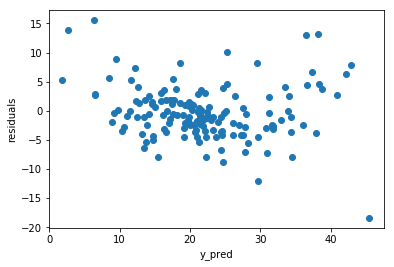

In [30]:
"""Here we plot the residuals against our predictions, as we can see we can randomness around
zero mean. Assumption II met"""
plt.scatter(prediction_2,residual)
plt.xlim(0,)
plt.xlabel("y_pred")
plt.ylabel("residuals")
plt.show()

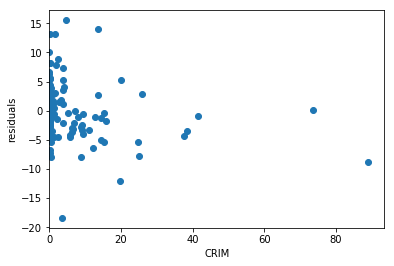

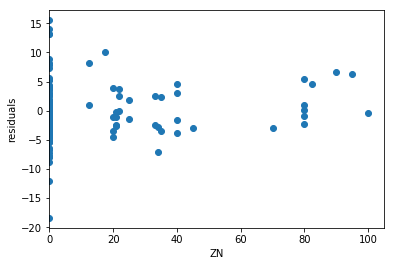

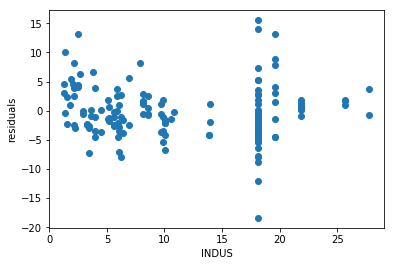

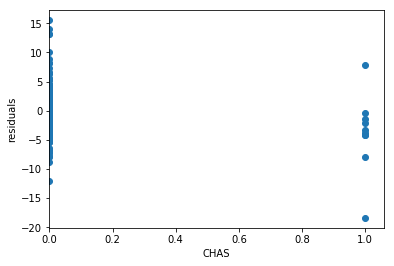

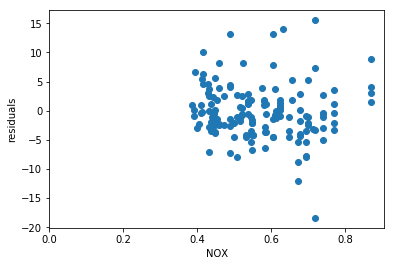

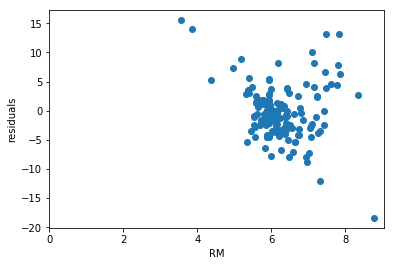

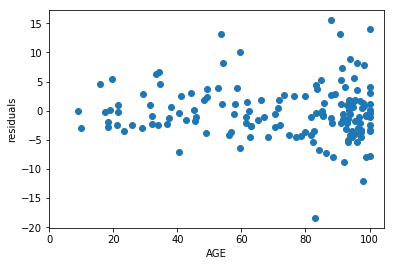

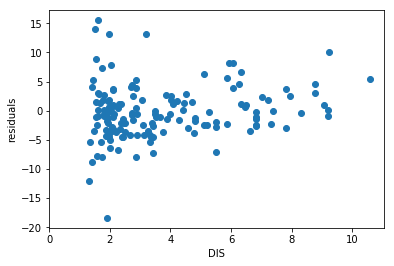

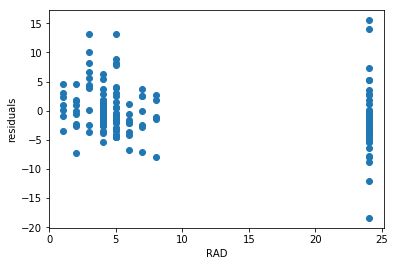

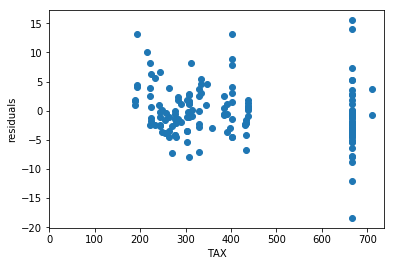

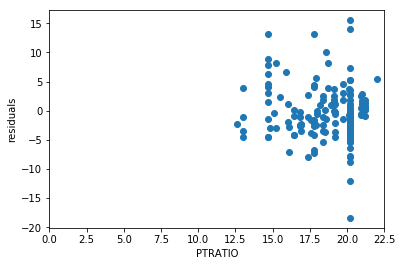

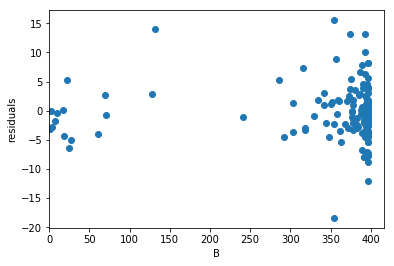

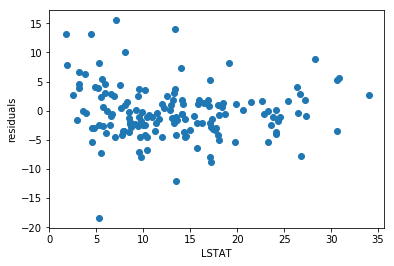

In [26]:
residual = Y_test.values-prediction_2
#print(residual)
for i in X_test:
    plt.scatter(X_test[i],residual)
    plt.xlim(0,)
    plt.xlabel(i)
    plt.ylabel("residuals")
    plt.show()

## Testing some classical assumptions


In [23]:
vif

,VIF Factor,features
0,1.940562,CRIM
1,3.037542,ZN
2,14.686894,INDUS
3,1.226836,CHAS
4,79.110268,NOX
5,70.616543,RM
6,29.207513,AGE
7,15.441100,DIS
8,15.145997,RAD
9,56.964792,TAX


In [ ]:
name = [ 'p-value']
#tests the hypothesis that the residual variance does not depend on the variables in x in the form
test = sm.stats.diagnostic.het_breushpagan(model_1.resid, model_1.model.exog)
lzip(name, test)